**Part 1** : Classes

In [ ]:
# Represents a generic neuron with basic properties and functions common to all neuron types.
class Neuron:
    def __init__(self, firing_rate: int):
        self.firing_rate = firing_rate

    def activate(self, stimulus: int):
        pass

# A neuron responsible for initiating muscle movement by sending activation signals to a target muscle
class Motor(Neuron):
    def __init__(self, target_muscle: str, firing_rate: int) -> None:
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self, activation_level: int) -> None:
        pass

# A motor neuron that controls skeletal muscles.
class AlphaMotor(Motor):
    def __init__(self, firing_rate: int):
        super().__init__("skeletal muscle", firing_rate)

    def control_muscle(self, activation_level: int) -> None:
        pass

# A motor neuron that controls muscle spindles, helping regulate muscle tone.
class GammaMotor(Motor):
    def __init__(self, firing_rate: int):
        super().__init__("muscle_spindle", firing_rate)

    def control_muscle(self, activation_level: int) -> None:
        pass

# A neuron that detects and responds to external stimuli. Each sensory neuron is sensitive to a specific type of stimulus, such as light or pressure.
class Sensory(Neuron):
    def __init__(self, receptor_type: str, firing_rate: int) -> None:
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus: int) -> None:
        pass

# A sensory neuron that responds to pressure
class Mechanoreceptor(Sensory):
    def __init__(self, firing_rate: int):
        super().__init__("pressure", firing_rate)

    def sense_stimulus(self, pressure: int) -> None:
        pass

# A sensory neuron specifically sensitive to light
class Photoreceptor(Sensory):
    def __init__(self, firing_rate: int):
        super().__init__("light", firing_rate)

    def sense_stimulus(self, light_intensity: int) -> None:
        pass


**Part 1** : Hirarchy image

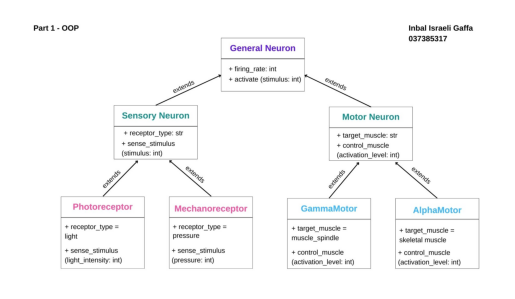

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'Neuron.jpg'


img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


percentage: 20.0%
Original signal length: 100
Downsampled signal length: 21
Actual ratio: 21.00%

percentage: 50.0%
Original signal length: 100
Downsampled signal length: 61
Actual ratio: 61.00%


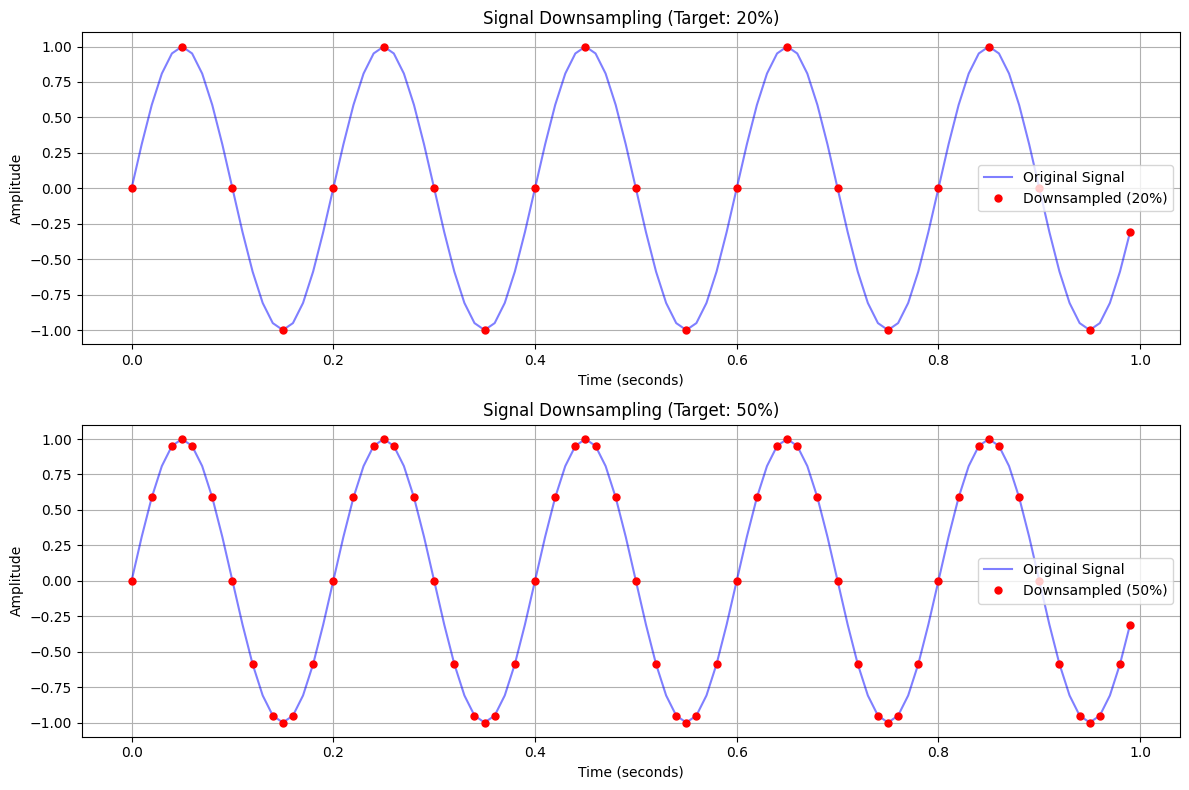

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def downsample_signal(signal, percentage=0.2):
    # Calculate step size to achieve target ratio
    step_size = int(1 / percentage)

    # Find maxima and minima using vectorized operations
    maxima = np.r_[True, signal[1:] > signal[:-1]] & np.r_[signal[:-1] > signal[1:], True] #compares each point with the next point, and if it's higher, so it's true
    minima = np.r_[True, signal[1:] < signal[:-1]] & np.r_[signal[:-1] < signal[1:], True] #compares each point with the next point, and if it's less, so it's true

    # Get indices of extrema
    max_indices = np.where(maxima)[0]
    min_indices = np.where(minima)[0]

    # Take regular samples based on target ratio
    regular_samples = np.arange(0, len(signal), step_size)

    # Combine all points we want to preserve
    preserved_indices = np.unique(np.concatenate([
        max_indices,
        min_indices,
        regular_samples,
        [0, len(signal)-1]  # Add endpoints
    ]))

    # Create the downsampled signal
    downsampled = signal[preserved_indices]

    return downsampled, preserved_indices


t = np.arange(0, 1, 0.01)  #creates the "time axis"- array in a range between 0 to 1 (1/0.01 = 100, we sample every 0.01 sec so in total 100 samples)
original = np.sin(2 * np.pi * 5 * t) #creates the sinusoidal signal with frequency of 5 hertz

percentages = [0.2, 0.5] #so we can be flexible with the code, if we want to change the %, we can do it only at the upper raw (percentage)

fig, axes = plt.subplots(len(percentages), 1, figsize=(12, 4*len(percentages)))

for ax, ratio in zip(axes, percentages):
    # Downsample the signal with current ratio
    new_signal, indices = downsample_signal(original, ratio)

    # Print statistics
    print(f"\npercentage: {ratio:.1%}")
    print(f"Original signal length: {len(original)}")
    print(f"Downsampled signal length: {len(new_signal)}")
    print(f"Actual ratio: {len(new_signal)/len(original):.2%}")

    # Plot results
    ax.plot(t, original, 'b-', label='Original Signal', alpha=0.5)
    ax.plot(t[indices], new_signal, 'r.',
            label=f'Downsampled ({ratio:.0%})', markersize=10)
    ax.grid(True)
    ax.legend()
    ax.set_title(f'Signal Downsampling (Target: {ratio:.0%})')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

**Part 2** - Q2

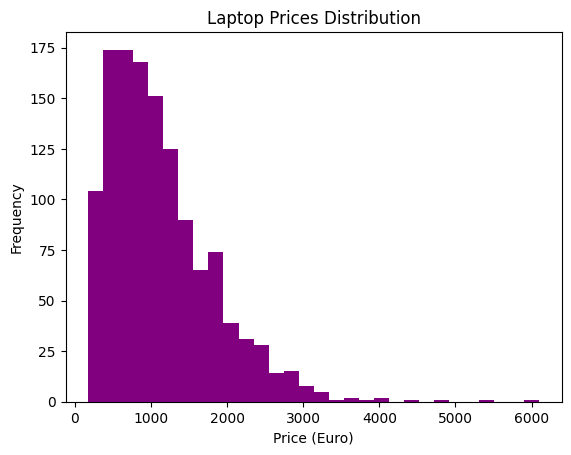

In [ ]:
#Plot the price of all the laptops
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('laptop_price - dataset.csv')
plt.hist(df['Price (Euro)'], bins=30, color = 'purple')
plt.title('Laptop Prices Distribution')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.show()

In [22]:
#Which company has on average the most expensive laptop? What is the average laptop price for each company?
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('laptop_price - dataset.csv')
averages_by_comapny = df.groupby('Company')['Price (Euro)'].mean()
sorted = averages_by_comapny.sort_values(ascending=False)
print("Average price by company:")
print(sorted)
most_expensive = sorted.index[0]
highest_average = sorted.iloc[0]
print(f"\nThe company with the most expensive laptops on average is {most_expensive}")
print(f"with an average price of {highest_average:.2f} Euro")

Average price by company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

The company with the most expensive laptops on average is Razer
with an average price of 3346.14 Euro


Before cleaning:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

After cleaning:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


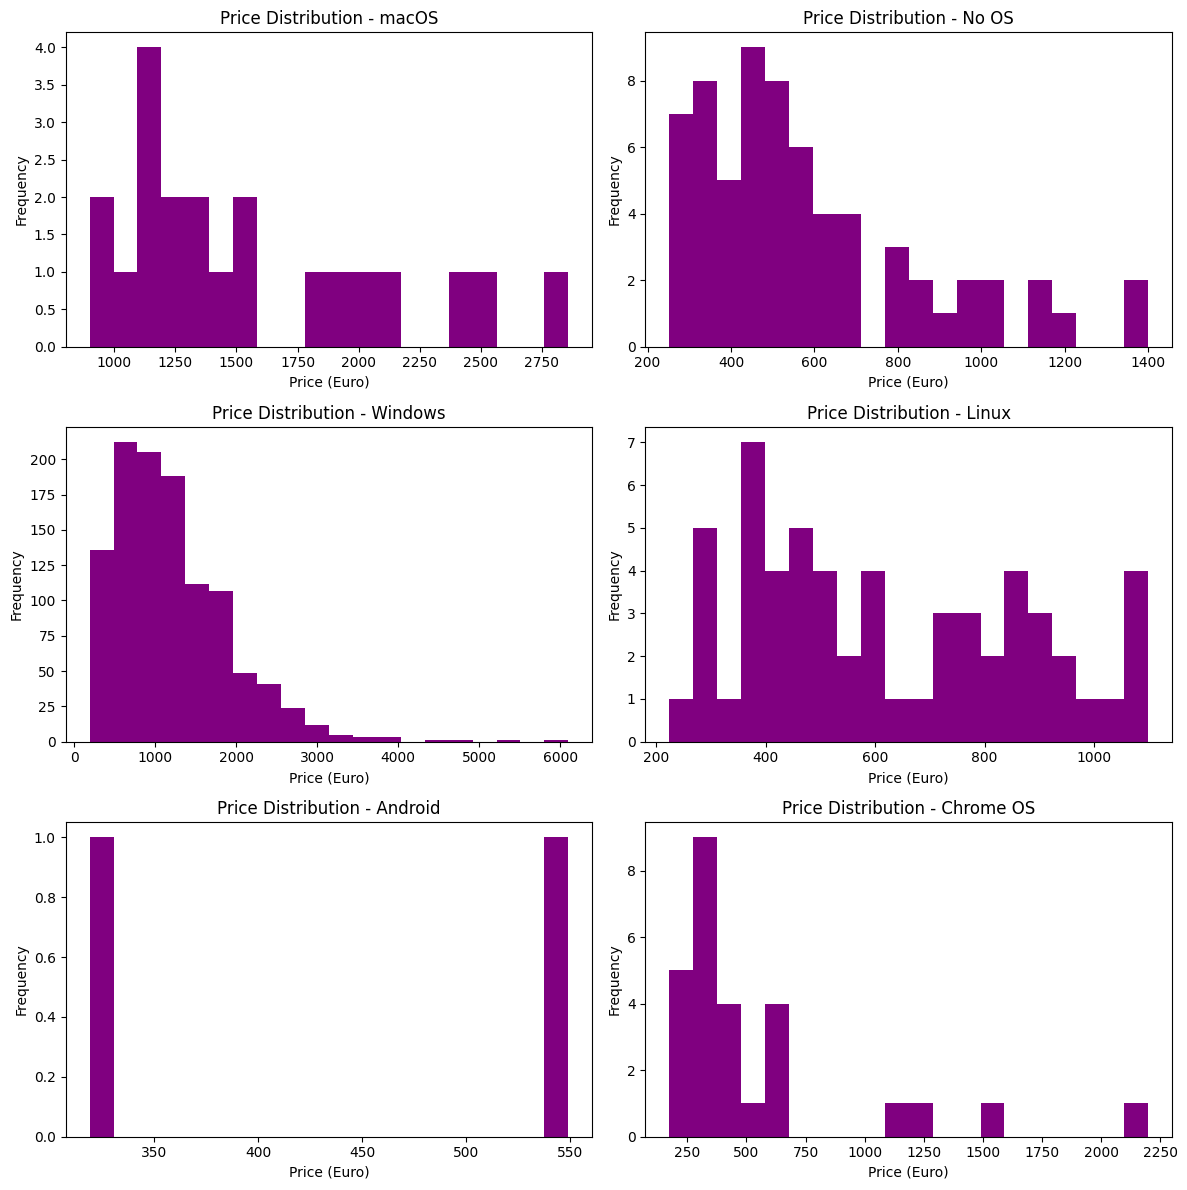

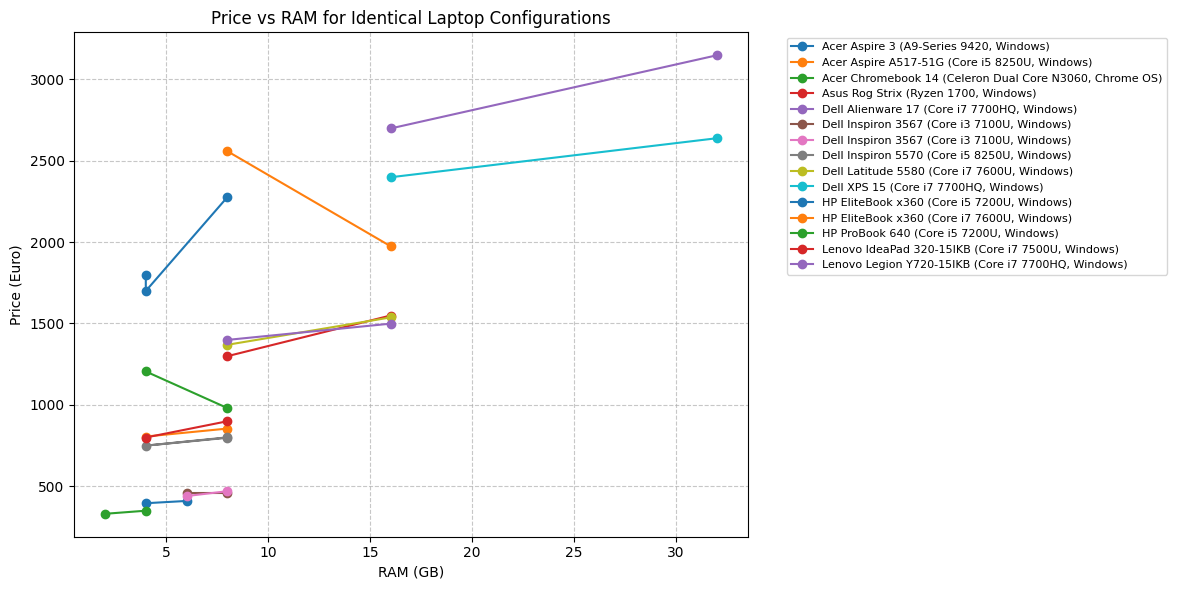

In [23]:
#Find the different types of Operating systems present in the data - under the column name "OpSys".
#Please note - there are operating systems that are the same systems and just
#written differently in the column - please fix them to be uniform

import pandas as pd

df = pd.read_csv('laptop_price - dataset.csv')

# I want to show all the operating systems before cleaning the data
print("Before cleaning:")
print(df['OpSys'].unique())
#after I check the operating systems, I assumed that different versions of the same operating system will be united.
df['OpSys'] = df['OpSys'].replace({
    r'Windows.*': 'Windows',  # everything that starts with Windows
    r'Mac.*': 'macOS',       # everything that starts with Mac
    r'mac.*': 'macOS'        # everything that starts with mac (small letters)
}, regex=True)

# I want to show all the operating systems after cleaning the data
opsys_types = df['OpSys'].unique()
print("\nAfter cleaning:")
print(opsys_types)

n_os = len(opsys_types)

n_cols = 2  # two graphs each row
n_rows = (n_os + 1) // 2  # how many row we need
plt.figure(figsize=(12, 4*n_rows))
for i, os in enumerate(opsys_types):
    plt.subplot(n_rows, n_cols, i+1)
    prices = df[df['OpSys'] == os]['Price (Euro)']
    plt.hist(prices, bins=20, color='purple')
    plt.title(f'Price Distribution - {os}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



#RAM and Computer's price question

#In this exercise I wanted to check what is the relationship between the computer's price and its RAM. I needed to isolate the RAM
#from other components, in order to check specifically that the price is affected by the RAM and not other compnent such as CPU.
# We can see a trend that the price is increasing when the RAM is higher (except for two models that the price is also affected by other factors like CPU).

groups = df.groupby([col for col in df.columns if col not in ['Price (Euro)', 'RAM (GB)']]) # Group by all columns except Price and RAM, then get groups with multiple RAM values


# Find groups with multiple RAM configurations
valid_groups = [group for name, group in groups if len(group['RAM (GB)'].unique()) > 1]

# Create a figure
plt.figure(figsize=(12, 6))

# Plot each group's RAM vs Price relationship
for idx, group in enumerate(valid_groups):
    ram = group['RAM (GB)']
    price = group['Price (Euro)']

    # Create a descriptive label
    label = f"{group['Company'].iloc[0]} {group['Product'].iloc[0]} ({group['CPU_Type'].iloc[0]}, {group['OpSys'].iloc[0]})"

    # Plot with slight horizontal offset for better visibility
    plt.plot(ram, price, 'o-', label=label)

plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('Price vs RAM for Identical Laptop Configurations')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

def extract_storage_type(memory_string):
    """
    Extract the storage type from the memory specification string.
    Returns 'Hybrid' if multiple storage types are present.
    """
    memory_string = str(memory_string).upper()

    # Check if there are multiple storage types (contains '+')
    if '+' in memory_string:
        return 'Hybrid'

    # For single storage types
    if 'SSD' in memory_string:
        return 'SSD'
    elif 'HDD' in memory_string:
        return 'HDD'
    elif 'HYBRID' in memory_string:
        return 'Hybrid'
    elif 'FLASH STORAGE' in memory_string:
        return 'Flash Storage'

    return 'Unknown'

# Read the CSV file
df = pd.read_csv('laptop_price - dataset.csv')

# Add new column with storage type
df['Storage type'] = df['Memory'].apply(extract_storage_type)

# Save the updated dataset to a new CSV file
df.to_csv('laptop_price_with_storage_type.csv', index=False)
print("\nNew CSV file 'laptop_price_with_storage_type.csv' has been created successfully!")


New CSV file 'laptop_price_with_storage_type.csv' has been created successfully!


**Bonus question**


In [ ]:
# Here are few interesting questions for further analysis:

In [ ]:
#Which company produces the heaviest/lightest laptops on average?
#Analysis: bar chart of average weights

#What is the distribution of screen sizes across different laptop types (Gaming/Ultrabook/Notebook)?
#Analysis: histogram for each laptop type

#Which CPU_Company (Intel/AMD) dominates different price ranges?
#Analysis: pie charts for different price segment

#How does the presence of an SSD versus HDD affect the laptop price?
#Analysis: bar chart

#What's the average price difference between laptops with different GPU brands (NVIDIA vs AMD vs Intel)?
#Analysis: bar chart

#Is there a relationship between screen resolution and price?
#Analysis: Bar chart grouping resolutions (as we did in the previous questions)

#What's the price distribution for different laptop types (Gaming/Ultrabook/Notebook)?
#Analysis: Bar chart (as we did in the previous questions)

#Which Operating System is most common in high-end laptops (>2000 Euro)?
#Analysis: pie chart



Number of laptops by company:
Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


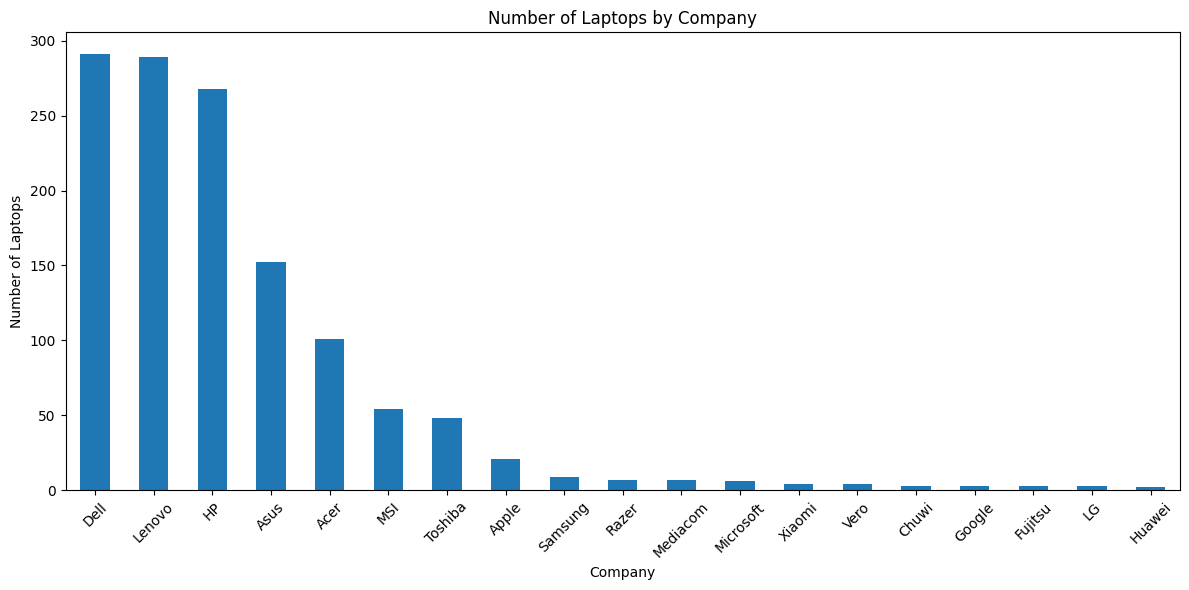

In [ ]:
#Select two questions and implement:

#Number of laptops by company in our data set:
plt.figure(figsize=(12, 6))
df['Company'].value_counts().plot(kind='bar')
plt.title('Number of Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.tight_layout()

print("\nNumber of laptops by company:")
print(df['Company'].value_counts())



Number of unique models by company:
Company
Acer          55
Apple          4
Asus         127
Chuwi          3
Dell          62
Fujitsu        3
Google         1
HP           122
Huawei         1
LG             3
Lenovo       138
MSI           47
Mediacom       6
Microsoft      1
Razer          2
Samsung        4
Toshiba       36
Vero           4
Xiaomi         1
Name: Product, dtype: int64


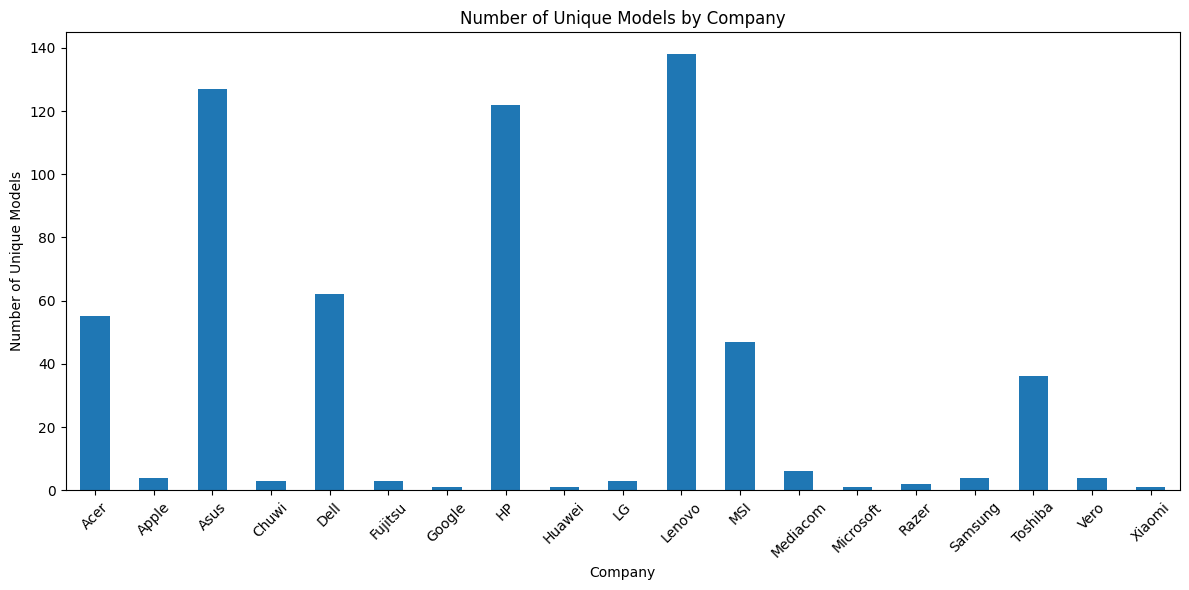

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('laptop_price - dataset.csv')

#How many unique models each company has
unique_models = df.groupby('Company')['Product'].nunique()
print("\nNumber of unique models by company:")
print(unique_models)

plt.figure(figsize=(12, 6))
unique_models.plot(kind='bar')
plt.title('Number of Unique Models by Company')
plt.xlabel('Company')
plt.ylabel('Number of Unique Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()